# Populating Data

In [29]:
import pandas as pd
import numpy as np
from faker import Faker

In [30]:
# Initialize Faker
fake = Faker()

In [31]:
# Set seed for reproducibility
np.random.seed(0)
Faker.seed(0)

In [32]:
# Generate 10,000 random dates within a given range
date_range = pd.date_range(start='2020-01-01', end='2023-01-01')
random_dates = np.random.choice(date_range, size=10000)

In [33]:
# Generate random integers for the other 4 columns
Price = np.random.randint(500, 2000, size=10000)
Quantity = np.random.randint(1, 10, size=10000)
Discount = np.random.randint(0, 50, size=10000)

In [34]:
# Generate random full names
names = [fake.name() for _ in range(10000)]

In [35]:
# Adding list of phone types as items
Item = ['iPhone', 'Samsung Galaxy', 'Google Pixel', 'OnePlus', 'Huawei', 'Sony Xperia', 'Nokia','Motorola']
random_phone_types = np.random.choice(Item, size=10000)

In [36]:
# Create a DataFrame
df = pd.DataFrame({
    'Date': random_dates,
    'FullName': names,
    'Item': random_phone_types,
    'Price': Price,
    'Quantity': Quantity,
    'Discount': Discount
})

In [37]:
# Ensuring Price, quantity and Discount are Numeric
df['Price']=pd.to_numeric(df['Price'])
df['Quantity']=pd.to_numeric(df['Quantity'])
df['Discount']=pd.to_numeric(df['Discount'])
df.head(5)

,Date,FullName,Item,Price,Quantity,Discount
0,2021-11-15,Norma Fisher,Nokia,1390,8,23
1,2021-07-13,Jorge Sullivan,Nokia,1161,8,40
2,2022-04-15,Elizabeth Woods,OnePlus,645,4,15
3,2022-02-02,Susan Wagner,Sony Xperia,569,6,34
4,2022-10-30,Peter Montgomery,OnePlus,1488,8,35


# Calculating Column1 (TotalPrice)

In [38]:
# Calculating Total Price as the Product of Price and Quantity, accounting for Discount
df['TotalPrice'] = df['Price']*df['Quantity']*(1 - df['Discount'] / 100)

In [39]:
# Printing the dataframe including the TotalPrice Column
df.head(5)

,Date,FullName,Item,Price,Quantity,Discount,TotalPrice
0,2021-11-15,Norma Fisher,Nokia,1390,8,23,8562.40
1,2021-07-13,Jorge Sullivan,Nokia,1161,8,40,5572.80
2,2022-04-15,Elizabeth Woods,OnePlus,645,4,15,2193.00
3,2022-02-02,Susan Wagner,Sony Xperia,569,6,34,2253.24
4,2022-10-30,Peter Montgomery,OnePlus,1488,8,35,7737.60


# Calculating Column2 (FinalPrice)

In [40]:
# Assuming a fixed Tax Rate of 10%
tax_rate = 0.10

In [41]:
# Calculating FinalPrice which includes tax
df['FinalPrice'] = df['TotalPrice'] * (1 + tax_rate)

In [42]:
df.head(5)

,Date,FullName,Item,Price,Quantity,Discount,TotalPrice,FinalPrice
0,2021-11-15,Norma Fisher,Nokia,1390,8,23,8562.40,9418.640
1,2021-07-13,Jorge Sullivan,Nokia,1161,8,40,5572.80,6130.080
2,2022-04-15,Elizabeth Woods,OnePlus,645,4,15,2193.00,2412.300
3,2022-02-02,Susan Wagner,Sony Xperia,569,6,34,2253.24,2478.564
4,2022-10-30,Peter Montgomery,OnePlus,1488,8,35,7737.60,8511.360


# Calculatin Column3 OriginalTotalPrice

In [43]:
# Calculating The DiscountedPrice
# ORIGINAL  TOTAL PRICE WITHOUT DISCOUNT
df['OriginalTotalPrice'] = df['Price'] * df ['Quantity']
df.head(5)

,Date,FullName,Item,Price,Quantity,Discount,TotalPrice,FinalPrice,OriginalTotalPrice
0,2021-11-15,Norma Fisher,Nokia,1390,8,23,8562.40,9418.640,11120
1,2021-07-13,Jorge Sullivan,Nokia,1161,8,40,5572.80,6130.080,9288
2,2022-04-15,Elizabeth Woods,OnePlus,645,4,15,2193.00,2412.300,2580
3,2022-02-02,Susan Wagner,Sony Xperia,569,6,34,2253.24,2478.564,3414
4,2022-10-30,Peter Montgomery,OnePlus,1488,8,35,7737.60,8511.360,11904


# Performing Correlation Analysis Using Heatmap

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [45]:
# selecting two column i will use for correlation analysis
corr = ['Price' ,'TotalPrice']

In [46]:
# Creating a DataFrame with only the selected column
techlius_corr = df[corr]

In [47]:
# Calculating the correlation Matrix
corr_matrix = techlius_corr.corr()

# Plotting Heatmap

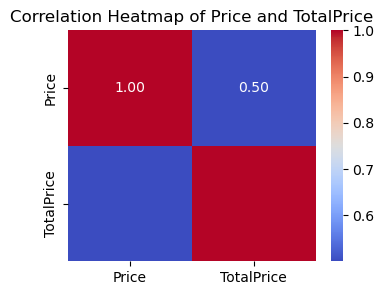

In [48]:
plt.figure(figsize=(4,3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap of Price and TotalPrice')
plt.show()


#The correlation coefficient ranges from -1 to 1

#1 indicates a positive correlation
#-1 indicates a perfect nagative correlation
#0 indicates no correlation

#0.5 indicates moderate positive correlation: 
#There is a tendency for Price and TotalPrice to increase together. 
#coefficient of 0.5 imply that as the Price of the item increases, 
#the TotalPrice after applying discounts and taxes, tends to increase.

# Sort and filter on my Data

# Sorting by Price in Descending Order

In [49]:
sortdf = df.sort_values (by = 'Price', ascending=False)
sortdf.head(5) #Top 5 most expensive Items

,Date,FullName,Item,Price,Quantity,Discount,TotalPrice,FinalPrice,OriginalTotalPrice
7155,2021-12-17,Kirsten Wagner,OnePlus,1999,9,3,17451.27,19196.397,17991
6612,2021-01-24,Michael Burns,iPhone,1999,5,5,9495.25,10444.775,9995
4255,2020-11-01,Thomas Barnes,Huawei,1999,3,1,5937.03,6530.733,5997
970,2022-09-21,David Orr,Huawei,1999,9,5,17091.45,18800.595,17991
6370,2020-05-18,Lisa Mclaughlin,Motorola,1999,4,7,7436.28,8179.908,7996


# Filtering by Discount greater than 20%

In [50]:
filterdf = df[df['Discount'] >20]
filterdf.head(5)

,Date,FullName,Item,Price,Quantity,Discount,TotalPrice,FinalPrice,OriginalTotalPrice
0,2021-11-15,Norma Fisher,Nokia,1390,8,23,8562.40,9418.640,11120
1,2021-07-13,Jorge Sullivan,Nokia,1161,8,40,5572.80,6130.080,9288
3,2022-02-02,Susan Wagner,Sony Xperia,569,6,34,2253.24,2478.564,3414
4,2022-10-30,Peter Montgomery,OnePlus,1488,8,35,7737.60,8511.360,11904
5,2020-10-04,Theodore Mcgrath,iPhone,532,1,28,383.04,421.344,532


# Filtering by PhoneName

In [51]:
filterPhone = df[df['Item'] == 'iPhone']
filterPhone.head()

,Date,FullName,Item,Price,Quantity,Discount,TotalPrice,FinalPrice,OriginalTotalPrice
5,2020-10-04,Theodore Mcgrath,iPhone,532,1,28,383.04,421.344,532
6,2021-08-22,Stephanie Collins,iPhone,1931,8,30,10813.60,11894.960,15448
14,2022-04-29,Dana Nguyen,iPhone,532,7,23,2867.48,3154.228,3724
16,2022-04-25,Walter Pratt,iPhone,1808,3,30,3796.80,4176.480,5424
18,2022-02-16,Tasha Rodriguez,iPhone,1136,4,49,2317.44,2549.184,4544


# Creating Four Visuals on my Data

C:\Users\JULIUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


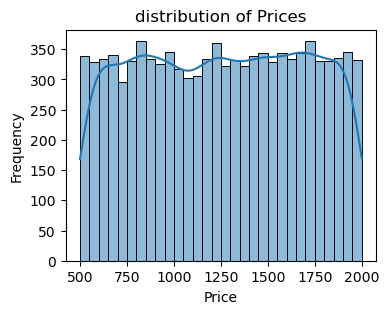

In [52]:
# Distribution of Prices Histogram
plt.figure(figsize=(4,3))
sns.histplot(df['Price'], bins = 30, kde = True)
plt.title('distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


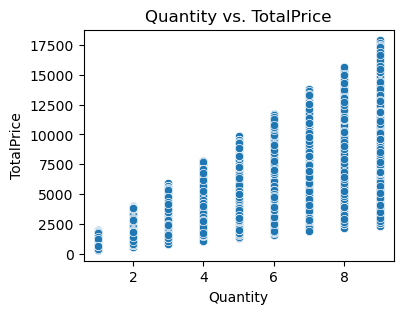

In [53]:
# Quantity vs. TotalPrice Scatter Plot
plt.figure(figsize=(4,3))
sns.scatterplot(x='Quantity', y = 'TotalPrice', data =df)
plt.title('Quantity vs. TotalPrice')
plt.xlabel('Quantity')
plt.ylabel('TotalPrice')
plt.show()


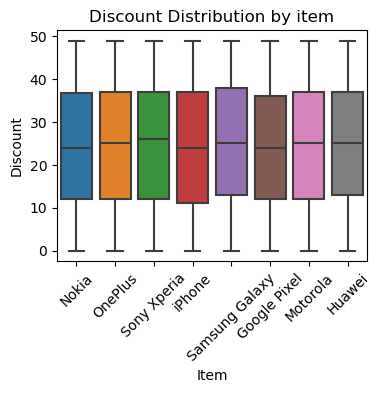

In [54]:
#Discount Distribution by item
plt.figure(figsize=(4,3))
sns.boxplot(x='Item', y = 'Discount', data =df)
plt.title('Discount Distribution by item')
plt.xlabel('Item')
plt.ylabel('Discount')
plt.xticks(rotation = 45)
plt.show()

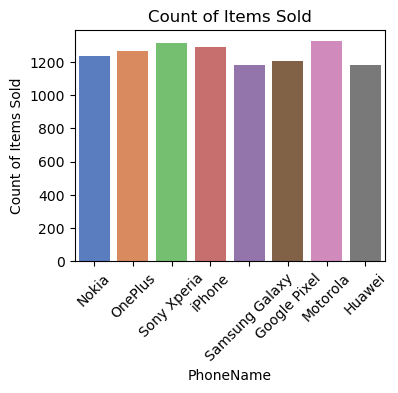

In [56]:
#Count of Items sold by Phone Name
plt.figure(figsize=(4,3))
sns.countplot(x = 'Item',data =df, palette='muted')
plt.title('Count of Items Sold')
plt.xlabel('PhoneName')
plt.ylabel('Count of Items Sold')
plt.xticks(rotation =45)
plt.show()

